In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
plt.style.use("seaborn")

In [3]:
mean_01=np.array([1,0])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,1000)
dist_02=np.random.multivariate_normal(mean_02,cov_02,1000)

print(dist_01.shape)
print(dist_02.shape)

(1000, 2)
(1000, 2)


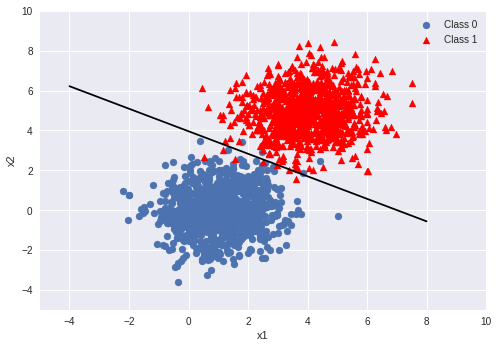

In [42]:
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
x=np.linspace(-4,8,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y,c='black')
plt.legend()
plt.show()

In [5]:
# Preparing data into testing and training
ones=np.ones((dist_02.shape[0],1))
zeros=np.zeros((dist_01.shape[0],1))
class0=np.hstack((zeros,dist_01))
class1=np.hstack((ones,dist_02))
X=np.vstack((class0,class1))
np.random.shuffle(X)
X_train=X[:int(X.shape[0]*0.8),1:]
Y_train=X[:int(X.shape[0]*0.8),0]
X_test=X[int(X.shape[0]*0.8):,1:]
Y_test=X[int(X.shape[0]*0.8):,0]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [6]:
e=np.exp(2)
print(e)

7.38905609893065


In [35]:
def hypothesis(theta,x):
    return 1/(1+np.exp(-(np.dot(theta,x))))
def gradient(hyp,y,x):
    return (y-hyp)*x
def cost(X,Y,theta):
    #ones=np.ones((X.shape[0],1))
    #X=np.hstack((ones,X))
    m=X.shape[0]
    cost=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        cost+=Y[i]*np.log2(hx)+(1-Y[i])*np.log2(1-hx)
    return cost/m
def gradientascent(X,Y,learning_rate=0.1):
    theta=np.zeros((1+X.shape[1],))
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    k=0
    loss=[]
    prev_loss=0
    cur_loss=1
    while(abs(prev_loss-cur_loss)>=0.000001):
        prev_loss=cur_loss
        for i in range(X.shape[0]):
            hyp=hypothesis(theta,X[i,:])
            for j in range(X.shape[1]):
                #print(gradient(hyp,Y[i],X[i,j]))
                theta[j] = theta[j] +learning_rate*gradient(hyp,Y[i],X[i,j])
        cur_loss=-cost(X,Y,theta)
        loss.append(-cost(X,Y,theta))
        k+=1
    return theta,loss
def accuracy(X,Y,theta):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    cnt=0
    for i in range(X.shape[0]):
        hyp=hypothesis(theta,X[i,:])
        hyp=(hyp>=0.5)
        if(hyp==Y[i]):
            cnt+=1
    return cnt/X.shape[0]

In [36]:
theta,loss=gradientascent(X_train,Y_train)
print(theta)

[-14.76231211   2.10748111   3.72944644]


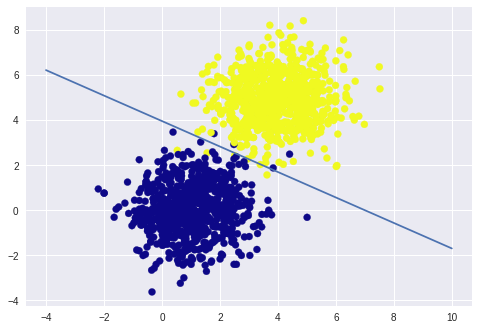

In [37]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap="plasma")
x=np.linspace(-4,10,100)
y=(-theta[0]-theta[1]*x)/theta[2]
plt.plot(x,y)
plt.show()

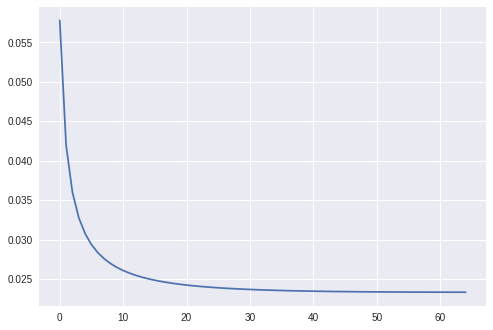

In [38]:
plt.plot(range(len(loss)),loss)
plt.show()

In [39]:
print("Training accuracy:{0:.4f}".format(accuracy(X_train,Y_train,theta)))
print("Testing accuracy:{0:.4f}".format(accuracy(X_test,Y_test,theta)))

Training accuracy:0.9938
Testing accuracy:0.9975
